* Ionic liquids— salts that melt below the boiling point of water.   
* Ionic liquids don't have a measurable vapor pressure at room temperature.     
* With typical vapor pressures in the range of 10^-10 pascal (10-14 psi), ionic liquids have essentially no vapor emissions and so look like excellent candidates for "green solvents" to replace hazardous, air-polluting organic solvents like acetone and benzene. 
* With dozens of anions and cations to choose from, they can be tailored to specific needs and may be particularly useful as solvents for biocatalysis.

In [1]:
import pandas as pd
import numpy as np
import salty
from salty import check_name
import pickle

visc_all=pd.read_csv('viscosity.csv') #all 13k data
d2=visc_all
salts=np.array(visc_all.salt_name)
unique_salts=np.unique(salts)
len(unique_salts)
print('there are '+str(len(unique_salts)) + ' unique salts')

there are 640 unique salts


#### Database ~13,000 out of which 640 salts are unique, the rest are repeated at different Temperatures and Pressures

In [2]:
salts=[]
two=[]
three=[]
four=[]
more=[]
for i in unique_salts:
    A=i.split()              #sorting 2,3,4 and more ions into separate lists
    if len(A)==2:
        two.append(A)
    elif len(A)==3:
        three.append(A)
    elif len(A)==4:
        four.append(A)
    else:
        more.append(A)

print('There are '+ str(len(two))+' salts of 1 each') #looks fine and clean
print('There are '+ str(len(three))+' salts of 2 cations/1anion or 2 anions/1 cation each') #confirm which belongs to what
print('There are '+ str(len(four))+' salts of 2 each')
print('There are '+ str(len(more))+' salts of 2 or more each')

There are 576 salts of 1 each
There are 59 salts of 2 cations/1anion or 2 anions/1 cation each
There are 2 salts of 2 each
There are 3 salts of 2 or more each


### Using salty to generate smiles

In [3]:
cation2=[]
anion2=[]
cation2_smiles=[]
anion2_smiles=[]
error2_anion=[]
error2_cation=[]

for i in two:
    cation2.append(i[0])
    anion2.append(i[1])

for i in cation2:
    #print(i)
    try:
        check_name(i)
        cation2_smiles.append(check_name(i))
    except:
        UnboundLocalError
        error2_cation.append(i)
        
for i in anion2:   #CHECKing CHECK_NAME FUNC FOR MISSING ANION OR CATION
    #print(i)
    try:
        check_name(i)
        anion2_smiles.append(check_name(i))
    except:
        UnboundLocalError
        error2_anion.append(i)
        #print(i)

print('There are '+ str(len(set(error2_anion)))+' unique missing anions from the data base')
#print(error2_anion)
print('There are '+ str(len(set(error2_cation)))+ ' unique missing cations from the data base')
#len(set(error2_anion))
#print(len(cation2))
#print(len(cation2_smiles))
#print(len(anion2))
#print(len(anion2_smiles))

There are 16 unique missing anions from the data base
There are 59 unique missing cations from the data base


In [4]:
df = pd.DataFrame({'cation':cation2,'anion':anion2,'cation_smiles':np.nan,'anion_smiles':np.nan})
for i in df.index:
    try:
        p=check_name(df['cation'][i])
        df.loc[i,'cation_smiles']=p
    except:
        UnboundLocalError
for i in df.index:
    try:
        p=check_name(df['anion'][i])
        df.loc[i,'anion_smiles']=p
    except:
        UnboundLocalError    

In [5]:
nan_rows = df[df.isnull().T.any().T]
print('Removing '+str(nan_rows.shape[0]) +' rows')
df=df.dropna()
print(df.shape)
df.to_csv('uniqsalts+smiles+viscosity.csv')

Removing 86 rows
(490, 4)


### Handling two word anions 

In [6]:
anion3=[]  #handling 2 word anions
cation3=[] 
count=0
for i in three:
    if 'sulfate' in i:
        anion3.append(i[1]+' '+i[2])
        cation3.append(i[0])
        count+=1
    elif 'phosphate' in i:
        anion3.append(i[1]+' '+i[2])
        cation3.append(i[0])
        count+=1
    elif 'phosphonate' in i:
        anion3.append(i[1]+' '+i[2])
        cation3.append(i[0])
        count+=1
    elif 'carbonate' in i:
        anion3.append(i[1]+' '+i[2])
        cation3.append(i[0])
        count+=1

print('handling '+ str(count)+ ' out of '+str(len(three)))

handling 53 out of 59


In [7]:
for n,i in enumerate(anion3): #fixing the space to make it compatible with database
    if i=='diethyl phosphate':
        anion3[n]='diethylphosphate'
    elif i=='dimethyl phosphate':
        anion3[n]='dimethylphosphate'


error3_anion=[]
for i in anion3:
        try:
            check_name(i)
        except:
            UnboundLocalError
            error3_anion.append(i)

error3_cation=[]
for i in cation3:
        try:
            check_name(i)
        except:
            UnboundLocalError
            error3_cation.append(i)



print('There are '+ str(len(set(error3_anion)))+ ' unique missing anions from the data base')
#error3_anion
print('There are '+ str(len(set(error3_cation)))+ ' unique missing cations from the data base')
#error3_cation

There are 0 unique missing anions from the data base
There are 7 unique missing cations from the data base


### Combining descriptors with the salts to 1 database

In [8]:
for i in d2.index:
    A=d2['salt_name'][i].split()
    if len(A)==2:
        pass
    else:
        d2.drop(i,axis=0,inplace=True)
d2=d2.drop(['Kinematic viscosity, m<SUP>2</SUP>/s'],axis=1)

In [9]:
cationDescriptors = salty.load_data("cationDescriptors.csv")
cationDescriptors.columns = [str(col) + '-cation' for col in cationDescriptors.columns]
anionDescriptors = salty.load_data("anionDescriptors.csv")
anionDescriptors.columns = [str(col) + '-anion' for col in anionDescriptors.columns]

In [10]:
c=[]
a=[]
for i in d2.index:
    c1,a1=d2['salt_name'][i].split()
    c.append(c1)
    a.append(a1)
d2['name-cation']=c  
d2['name-anion']=a
d3=pd.merge(d2,cationDescriptors,on="name-cation", how="inner")
d4=pd.merge(d3,anionDescriptors,on='name-anion',how="inner")
print(d4.shape)
d4.head()

(11280, 196)


,"Pressure, kPa","Temperature, K","Viscosity, Pa&#8226;s",salt_name,name-cation,name-anion,smiles-cation,steiger-cation,Marsili Partial Charges-cation,BalabanJ-cation,...,VSA_EState2-anion,VSA_EState3-anion,VSA_EState4-anion,VSA_EState5-anion,VSA_EState6-anion,VSA_EState7-anion,VSA_EState8-anion,VSA_EState9-anion,VSA_EState10-anion,Topliss fragments-anion
0,101.000,298.15,0.1954,1-hexyl-3-methylimidazolium tetrafluoroborate,1-hexyl-3-methylimidazolium,tetrafluoroborate,CCCCCCn1cc[n+](c1)C,777.0,777.0,2.153243,...,0.0,0.0,0.0,0.0,0.0,0.0,39.0,-6.0,0.0,777.0
1,101.325,298.15,0.1750,1-hexyl-3-methylimidazolium tetrafluoroborate,1-hexyl-3-methylimidazolium,tetrafluoroborate,CCCCCCn1cc[n+](c1)C,777.0,777.0,2.153243,...,0.0,0.0,0.0,0.0,0.0,0.0,39.0,-6.0,0.0,777.0
2,101.000,298.15,0.1718,1-hexyl-3-methylimidazolium tetrafluoroborate,1-hexyl-3-methylimidazolium,tetrafluoroborate,CCCCCCn1cc[n+](c1)C,777.0,777.0,2.153243,...,0.0,0.0,0.0,0.0,0.0,0.0,39.0,-6.0,0.0,777.0
3,101.325,298.15,0.2100,1-hexyl-3-methylimidazolium tetrafluoroborate,1-hexyl-3-methylimidazolium,tetrafluoroborate,CCCCCCn1cc[n+](c1)C,777.0,777.0,2.153243,...,0.0,0.0,0.0,0.0,0.0,0.0,39.0,-6.0,0.0,777.0
4,101.325,298.15,0.2024,1-hexyl-3-methylimidazolium tetrafluoroborate,1-hexyl-3-methylimidazolium,tetrafluoroborate,CCCCCCn1cc[n+](c1)C,777.0,777.0,2.153243,...,0.0,0.0,0.0,0.0,0.0,0.0,39.0,-6.0,0.0,777.0


### Removing rows with NA values for density

In [11]:
nan_rows = d4[d4.isnull().T.any().T]
print('Removing '+str(nan_rows.shape[0]) +' rows')
d4=d4.dropna()
d4.shape
d4.to_csv("salts+descriptors+viscosity.csv")
print('Final Shape: '+str(d4.shape))

Removing 177 rows
Final Shape: (11103, 196)


In [12]:
d4.describe()

,"Pressure, kPa","Temperature, K","Viscosity, Pa&#8226;s",steiger-cation,Marsili Partial Charges-cation,BalabanJ-cation,BertzCT-cation,Ipc-cation,HallKierAlpha-cation,Kappa1-cation,...,VSA_EState2-anion,VSA_EState3-anion,VSA_EState4-anion,VSA_EState5-anion,VSA_EState6-anion,VSA_EState7-anion,VSA_EState8-anion,VSA_EState9-anion,VSA_EState10-anion,Topliss fragments-anion
count,11103.000000,11103.000000,11103.000000,11103.0,11103.0,11103.000000,11103.000000,1.110300e+04,11103.000000,11103.000000,...,11103.0,11103.0,11103.0,11103.0,11103.0,11103.0,11103.000000,11103.000000,11103.000000,11103.0
mean,6700.281845,320.764293,0.410880,777.0,777.0,2.630523,188.877142,7.684650e+05,-0.603573,9.742788,...,0.0,0.0,0.0,0.0,0.0,0.0,60.083373,-3.015183,-4.741689,777.0
std,23746.929630,25.772530,2.865237,0.0,0.0,0.608614,75.259499,7.095635e+06,0.443749,6.002798,...,0.0,0.0,0.0,0.0,0.0,0.0,55.557726,20.223481,6.350050,0.0
min,60.000000,258.150000,0.000841,777.0,777.0,1.000000,2.000000,2.000000e+00,-2.080000,1.960000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-70.380285,-15.239861,777.0
25%,101.325000,303.000000,0.023800,777.0,777.0,2.218745,166.791393,1.472798e+02,-0.790000,7.259290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-12.406111,-13.443056,777.0
50%,101.325000,318.150000,0.058100,777.0,777.0,2.422978,190.892591,2.567231e+02,-0.790000,8.060402,...,0.0,0.0,0.0,0.0,0.0,0.0,39.000000,-6.000000,0.000000,777.0
75%,101.325000,338.150000,0.164000,777.0,777.0,2.837541,217.867691,1.049444e+03,-0.530000,10.291900,...,0.0,0.0,0.0,0.0,0.0,0.0,109.182500,8.467593,0.000000,777.0
max,300000.000000,573.000000,140.000000,777.0,777.0,4.739991,714.705652,1.936978e+08,0.430000,33.430000,...,0.0,0.0,0.0,0.0,0.0,0.0,222.417323,45.366093,17.194444,777.0


In [12]:
d4.drop_duplicates(keep='first').shape

(10846, 196)

In [19]:
import matplotlib.pyplot as plt
plt.hist?

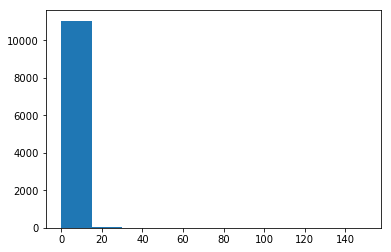

In [23]:
plt.hist(d4['Viscosity, Pa&#8226;s'],range=[0,150],bins=10,align='mid')
plt.show()

In [29]:
d4[d4['Pressure, kPa']>100000].shape

(194, 196)